## Домашнее задание

### Датасет с винами

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [50]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [2]:
data = load_wine()

In [3]:
list(data.target_names)

['class_0', 'class_1', 'class_2']

In [4]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
data.data.shape, data.target.shape

((178, 13), (178,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, shuffle=True, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [8]:
X_train

array([[1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.208e+01, 2.080e+00, 1.700e+00, ..., 1.270e+00, 2.960e+00,
        7.100e+02],
       [1.242e+01, 4.430e+00, 2.730e+00, ..., 9.200e-01, 3.120e+00,
        3.650e+02],
       ...,
       [1.438e+01, 1.870e+00, 2.380e+00, ..., 1.200e+00, 3.000e+00,
        1.547e+03],
       [1.269e+01, 1.530e+00, 2.260e+00, ..., 9.600e-01, 2.060e+00,
        4.950e+02],
       [1.234e+01, 2.450e+00, 2.460e+00, ..., 8.000e-01, 3.380e+00,
        4.380e+02]])

In [9]:
X_test

array([[1.364000e+01, 3.100000e+00, 2.560000e+00, 1.520000e+01,
        1.160000e+02, 2.700000e+00, 3.030000e+00, 1.700000e-01,
        1.660000e+00, 5.100000e+00, 9.600000e-01, 3.360000e+00,
        8.450000e+02],
       [1.421000e+01, 4.040000e+00, 2.440000e+00, 1.890000e+01,
        1.110000e+02, 2.850000e+00, 2.650000e+00, 3.000000e-01,
        1.250000e+00, 5.240000e+00, 8.700000e-01, 3.330000e+00,
        1.080000e+03],
       [1.293000e+01, 2.810000e+00, 2.700000e+00, 2.100000e+01,
        9.600000e+01, 1.540000e+00, 5.000000e-01, 5.300000e-01,
        7.500000e-01, 4.600000e+00, 7.700000e-01, 2.310000e+00,
        6.000000e+02],
       [1.373000e+01, 1.500000e+00, 2.700000e+00, 2.250000e+01,
        1.010000e+02, 3.000000e+00, 3.250000e+00, 2.900000e-01,
        2.380000e+00, 5.700000e+00, 1.190000e+00, 2.710000e+00,
        1.285000e+03],
       [1.237000e+01, 1.170000e+00, 1.920000e+00, 1.960000e+01,
        7.800000e+01, 2.110000e+00, 2.000000e+00, 2.700000e-01,
        1.04

### Нормализуем данные для корректной работы модели

In [10]:
def norm(x):
  min = x.min(axis=0)
  max = x.max(axis=0)
  return (x - min) / (max - min)

In [11]:
X_train = norm(X_train)
X_train

array([[0.56052632, 0.299389  , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.71473601],
       [0.27631579, 0.24236253, 0.18181818, ..., 0.64227642, 0.61904762,
        0.34042553],
       [0.36578947, 0.7209776 , 0.73262032, ..., 0.35772358, 0.67765568,
        0.06855792],
       ...,
       [0.88157895, 0.19959267, 0.54545455, ..., 0.58536585, 0.63369963,
        1.        ],
       [0.43684211, 0.13034623, 0.48128342, ..., 0.3902439 , 0.28937729,
        0.17100079],
       [0.34473684, 0.31771894, 0.58823529, ..., 0.2601626 , 0.77289377,
        0.12608353]])

In [12]:
X_test = norm(X_test)
X_test

array([[0.76109215, 0.49475891, 0.74137931, 0.02      , 0.84444444,
        0.62211982, 0.73760933, 0.        , 0.54585153, 0.32593857,
        0.52702703, 0.81746032, 0.38961988],
       [0.9556314 , 0.6918239 , 0.63793103, 0.39      , 0.73333333,
        0.69124424, 0.62682216, 0.2826087 , 0.36681223, 0.33788396,
        0.40540541, 0.80555556, 0.56140351],
       [0.51877133, 0.43396226, 0.86206897, 0.6       , 0.4       ,
        0.0875576 , 0.        , 0.7826087 , 0.14847162, 0.28327645,
        0.27027027, 0.40079365, 0.21052632],
       [0.79180887, 0.15932914, 0.86206897, 0.75      , 0.51111111,
        0.76036866, 0.80174927, 0.26086957, 0.86026201, 0.37713311,
        0.83783784, 0.55952381, 0.71125731],
       [0.32764505, 0.09014675, 0.18965517, 0.46      , 0.        ,
        0.35023041, 0.43731778, 0.2173913 , 0.27510917, 0.29010239,
        0.74324324, 0.86507937, 0.14473684],
       [0.98634812, 0.24737945, 0.87931034, 0.5       , 0.93333333,
        0.66820276, 0.76967

In [13]:
type(X_train)

numpy.ndarray

In [14]:
y_train

array([0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0,
       2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1,
       1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2,
       1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0,
       2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1,
       1])

In [15]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

### Создадим модель и подберем параметры

In [25]:
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [26]:
# создание keras модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
%%time
model.fit(X_train, 
          to_categorical(y_train), 
          epochs=30, 
          batch_size=32)

Epoch 1/30
5/5 [==============================] - 0s 3ms/step - loss: 1.0645 - accuracy: 0.3985
Epoch 2/30
5/5 [==============================] - 0s 3ms/step - loss: 0.9662 - accuracy: 0.6541
Epoch 3/30
5/5 [==============================] - 0s 3ms/step - loss: 0.8789 - accuracy: 0.8571
Epoch 4/30
5/5 [==============================] - 0s 3ms/step - loss: 0.7828 - accuracy: 0.8421
Epoch 5/30
5/5 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.8722
Epoch 6/30
5/5 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.9398
Epoch 7/30
5/5 [==============================] - 0s 3ms/step - loss: 0.4442 - accuracy: 0.9624
Epoch 8/30
5/5 [==============================] - 0s 3ms/step - loss: 0.3394 - accuracy: 0.9699
Epoch 9/30
5/5 [==============================] - 0s 3ms/step - loss: 0.2593 - accuracy: 0.9699
Epoch 10/30
5/5 [==============================] - 0s 3ms/step - loss: 0.1968 - accuracy: 0.9699
Epoch 11/30
5/5 [======================

### Оценим работу модели на тестовой выборке

In [28]:
# Evaluate the model.
model.evaluate(
  X_test,
  to_categorical(y_test)
)

2/2 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 1.0000


[0.038465552031993866, 1.0]

#### Модель показала неплохой результат не смотря на тот факт, что объем данных небольшой. Удалось избежать переобучения и показать хороший результат предсказания на тесте.

### Датасет с рукописными буквами

https://www.tensorflow.org/datasets/catalog/binary_alpha_digits

In [40]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [41]:
len(classes)

36

In [173]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

X = np.load('binary_alpha_digits_images.npy')
Y = np.load('binary_alpha_digits_labels.npy')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [174]:
len(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))

26

In [175]:
X.shape, Y.shape

((1404, 20, 16), (1404,))

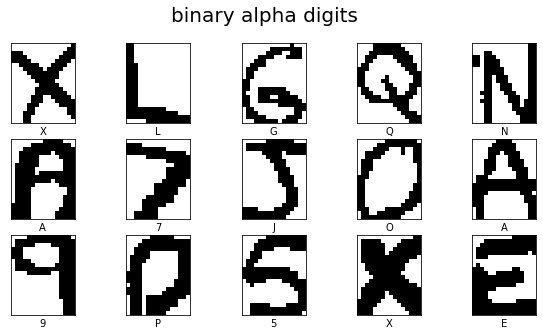

In [176]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[Y[n]])
    n += 1

#### Разделим данные на train и test и посмотрим их размерность

In [177]:
train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=42)

In [178]:
print(train_images.shape, len(train_labels), train_labels, sep='\n')

(1053, 20, 16)
1053
[12  9 20 ... 33 28 27]


In [179]:
print(test_images.shape, len(test_labels), test_labels, sep='\n')

(351, 20, 16)
351
[13 28  4 10 31 24 16 21 31  2  9  5  7  9 30 26  2  5  7 13 15 16 17 13
  5 16 12 16 28  3 20 35 18 32  8 35  4 25  8  4 22 18 11 22 25  6  7 35
 31 30 16 19  3 17 25 25 17  7 16 19  3  1 30 11  1 33  6 12 10 29 24 26
 27 15 22 18 19  4 24 16 17  3  8 19 14 31 19 27 21 12 30 17 32 19 29 32
 17 23 12 31 27 28  7 28 29 18  9  6 17  7 26 13 23 32 32  0 17 27  3 25
 23 18 23 12 34 13  8  1  0 22 10 29 11 18 13 34 12  8 28 14 35 33 29 32
 16 14 20  4 26  6 20 12 24 19  7 13 18  0 24 30 18 14  1  4 20 33  2  9
 12  3 18  5 32  1 11 14 17 26 32 35  4  4  7 32 27  8 18 34 10 17 29 19
 31 24 15 18 29 26  5 17 15 19 12  1  9 19  9 18 22 27 29 33 12  4 30  8
  5  0 30 24 32  4 14 26 15 19 11 19 10 28 26 29 14 26 14 33 13  9 35 33
 21 15  1  9 35 33 15 14 19 21 34 15 16 11 27 28 12 33  8 27  2  9  3 28
 22 35 34  0  4 15 32 11 20 17 17 11 10 16  5 12 32 34 32  6  3  0 26 21
 18  3 33 14 23 28  7 27 17  1  1 21 25 20 16 19  8 21 14 15 17  5 28 26
  9  5 23 15 26 21 22 16  5 34  8

**Данные представлены в виде изображений размером 20х16. Всего у нас имеется 36 уникальных значений.**

### Создадим модель и подберем параметры

In [205]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dropout(0.1),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(36)
])

In [208]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [209]:
%%time
model.fit(train_images, train_labels, epochs=30, verbose=1)

Epoch 1/30
33/33 [==============================] - 1s 3ms/step - loss: 0.5212 - accuracy: 0.8357
Epoch 2/30
33/33 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8936
Epoch 3/30
33/33 [==============================] - 0s 3ms/step - loss: 0.3435 - accuracy: 0.9193
Epoch 4/30
33/33 [==============================] - 0s 3ms/step - loss: 0.2700 - accuracy: 0.9335
Epoch 5/30
33/33 [==============================] - 0s 3ms/step - loss: 0.2208 - accuracy: 0.9430
Epoch 6/30
33/33 [==============================] - 0s 3ms/step - loss: 0.1917 - accuracy: 0.9620
Epoch 7/30
33/33 [==============================] - 0s 3ms/step - loss: 0.1685 - accuracy: 0.9506
Epoch 8/30
33/33 [==============================] - 0s 3ms/step - loss: 0.1563 - accuracy: 0.9554
Epoch 9/30
33/33 [==============================] - 0s 3ms/step - loss: 0.1293 - accuracy: 0.9677
Epoch 10/30
33/33 [==============================] - 0s 3ms/step - loss: 0.1249 - accuracy: 0.9592
Epoch 11/30
33/33 [

### Оценим работу моедли на тестовых данных

In [210]:
# Evaluate the model.
model.evaluate(
  test_images,
  test_labels
)

11/11 [==============================] - 0s 2ms/step - loss: 1.2661 - accuracy: 0.7009


[1.2660508155822754, 0.7008547186851501]

**На этой модели не удалось добиться 100% ни на трейни, ни на тесте. полагаю, это может быть связано с количеством классов, которые надо предсказать (36) и с небольшим объемом тренировочного датасета. Простые модели не показывают хорошую точность, а при усложнении модели она быстро переобучается и точность предсказания тоже начинает падать. 0.70 это наилучший результат, который я смог получить.** 